In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_loss_ppl(filepath):
    train_losses, train_ppls, val_losses, val_ppls = [], [], [], []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith('| end of epoch'):
                segments = line.split('|')
                train_losses.append(float(segments[3].split()[-1]))
                train_ppls.append(float(segments[4].split()[-1]))
                val_losses.append(float(segments[5].split()[-1]))
                val_ppls.append(float(segments[6].split()[-1]))
    assert len(train_losses) == len(train_ppls) == len(val_losses) == len(val_ppls)
    
    # plot
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=160)
    # loss
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, color='xkcd:gold', label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, color='xkcd:cerulean', label='val')
    axs[0].set_title('loss as training progresses')
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    axs[0].legend()
    # perplexity
    axs[1].plot(range(1, len(train_ppls) + 1), train_ppls, color='xkcd:gold', label='train')
    axs[1].plot(range(1, len(val_ppls) + 1), val_ppls, color='xkcd:cerulean', label='val')
    axs[1].set_title('perplexity as training progresses')
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('perplexity')
    axs[1].legend()
    plt.show()

In [3]:
def get_min_val_ppl(filepath):
    val_ppls = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith('| end of epoch'):
                segments = line.split('|')
                val_ppls.append(float(segments[6].split()[-1]))
    
    return min(val_ppls)

In [4]:
def show_min_val_ppl(filepath):
    # plot
    plt.figure(figsize=(10, 1), dpi=160)
    plt.text(0.35, 0.5, f"minimum val perplexity: {get_min_val_ppl(filepath)}", fontweight='bold')
    plt.axis('off')
    plt.show()

In [5]:
def show_heading(emsize, dropout_prob):
    # plot
    plt.figure(figsize=(10, 1), dpi=160)
    plt.text(0.0, 0.5, f"LSTM Model Embdedding Size {emsize}, Hidden Size {emsize}, Dropout {dropout_prob}",
             fontweight='bold', fontsize=14)
    plt.axis('off')
    plt.show()

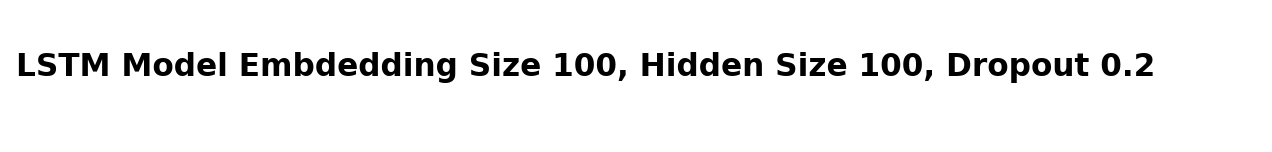

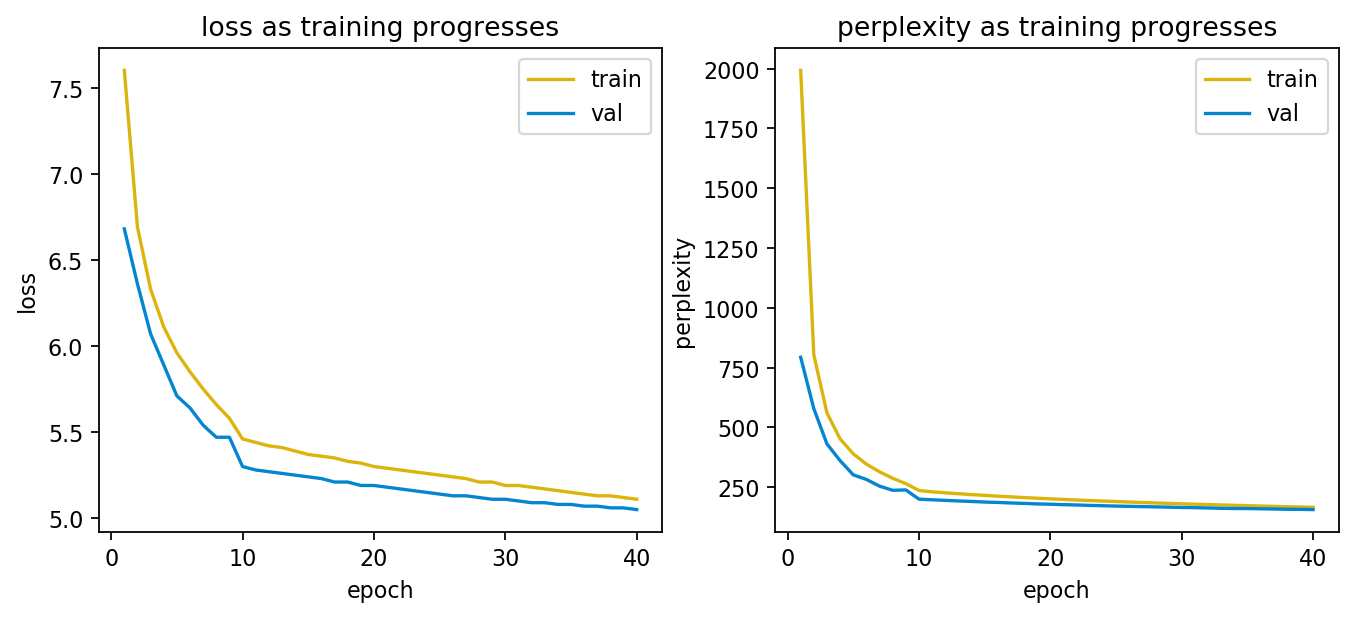

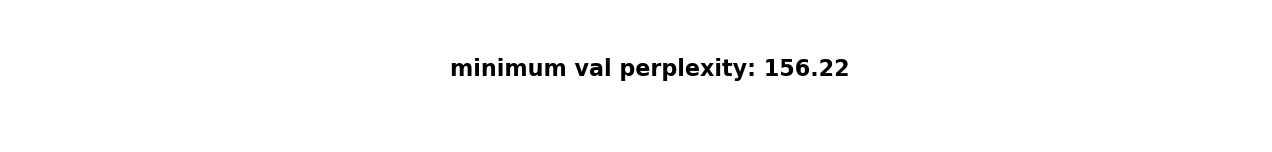

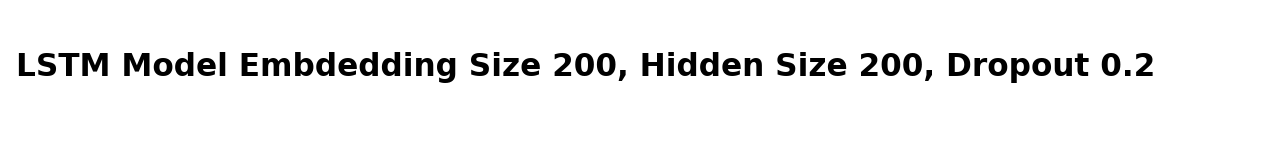

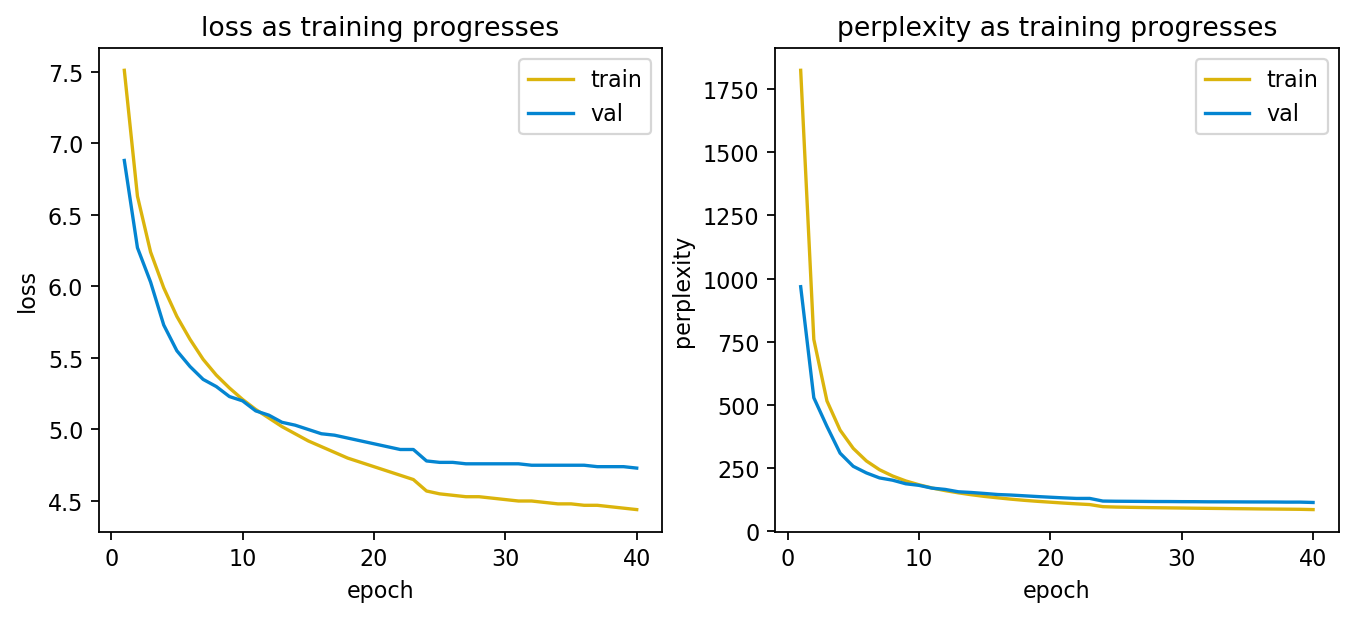

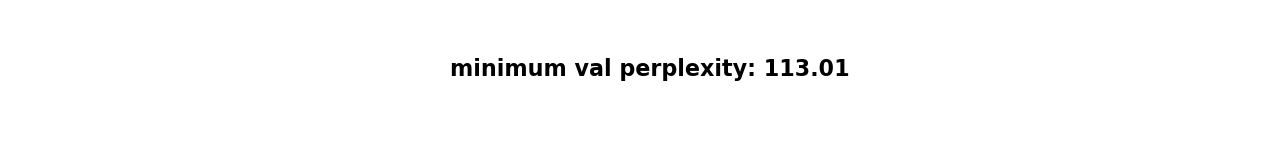

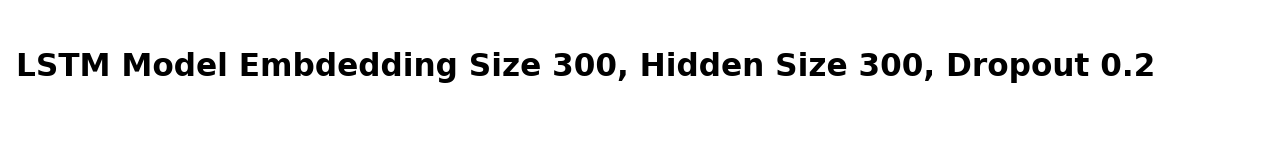

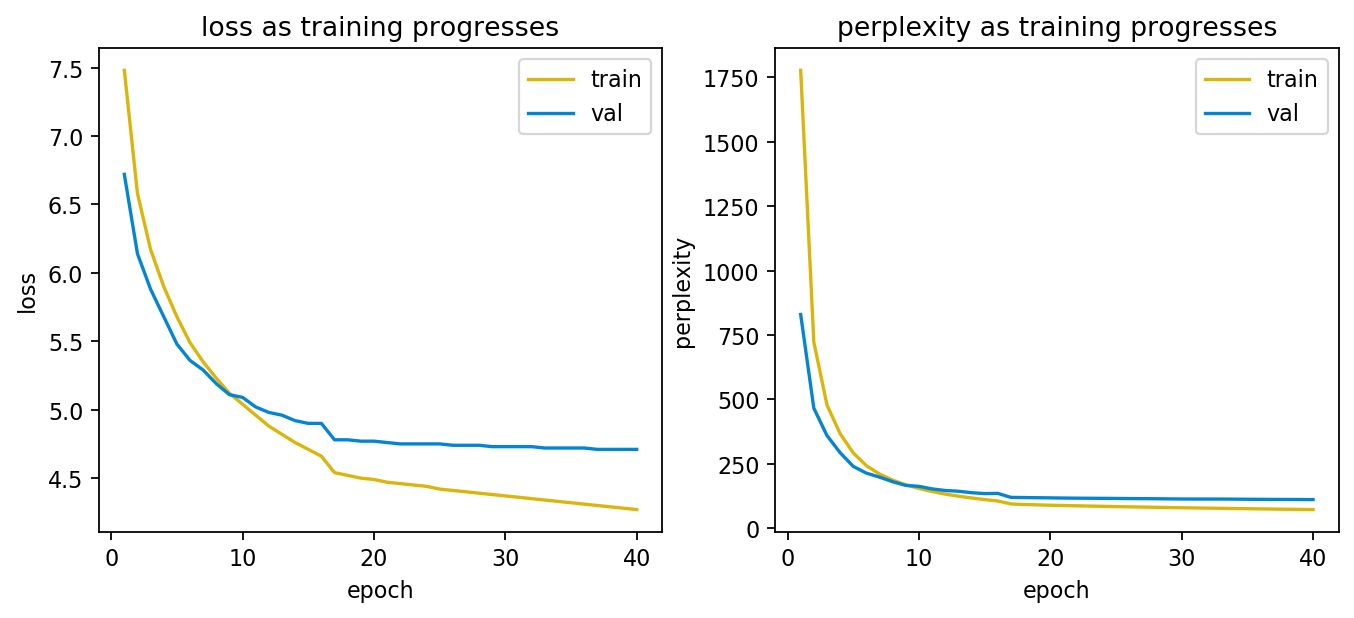

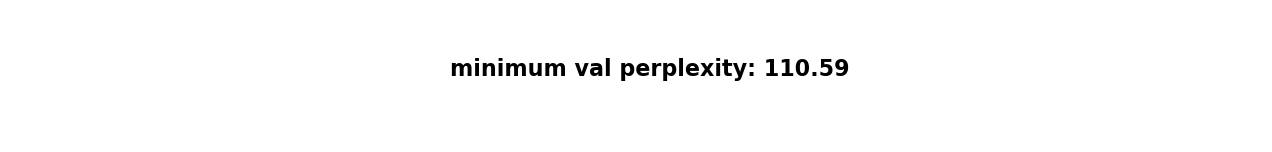

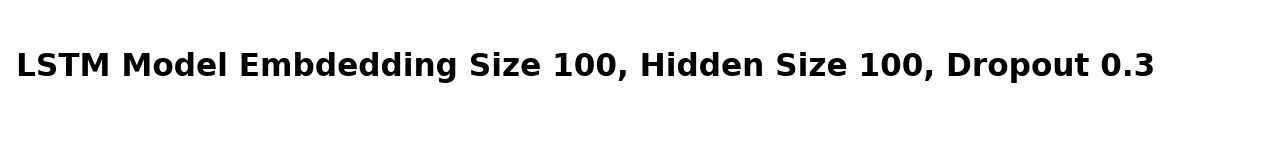

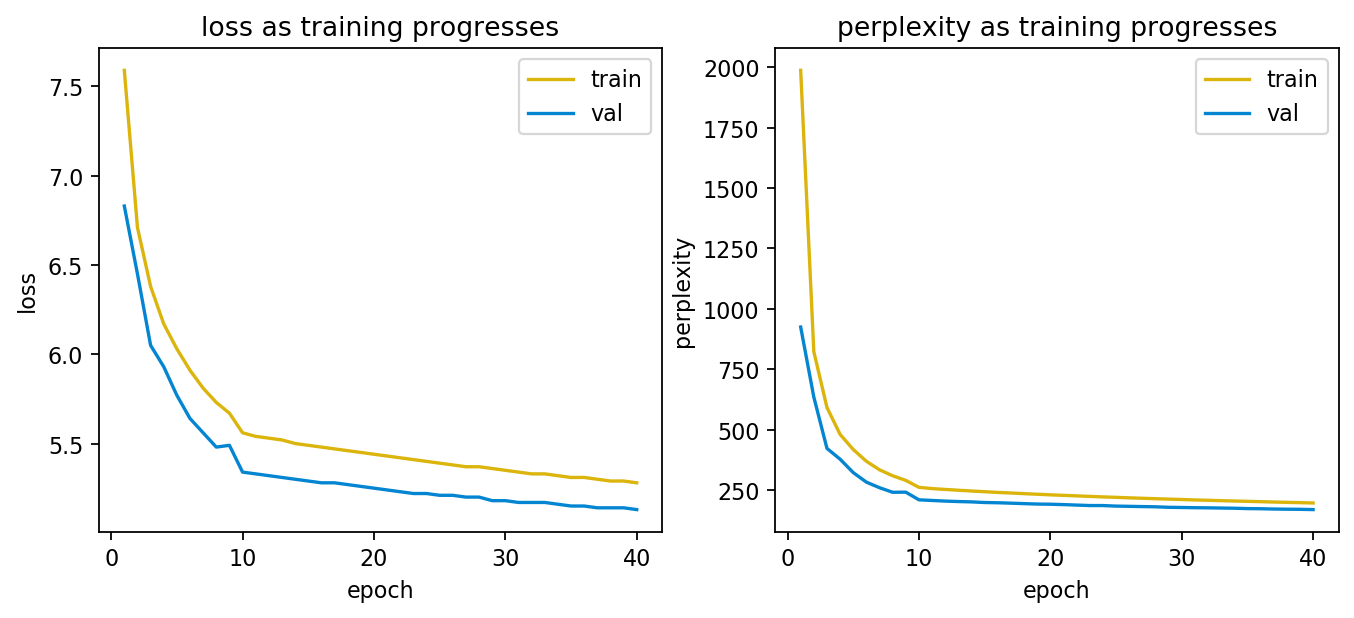

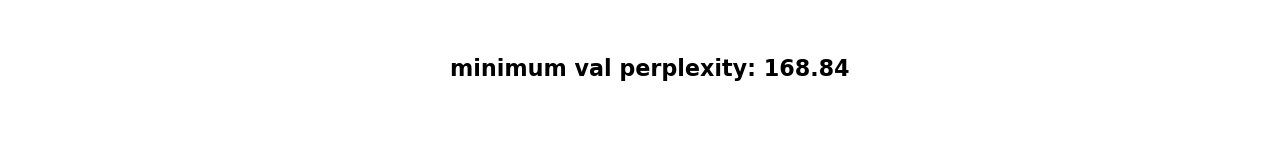

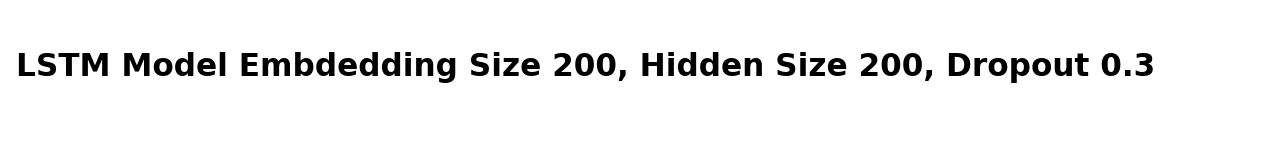

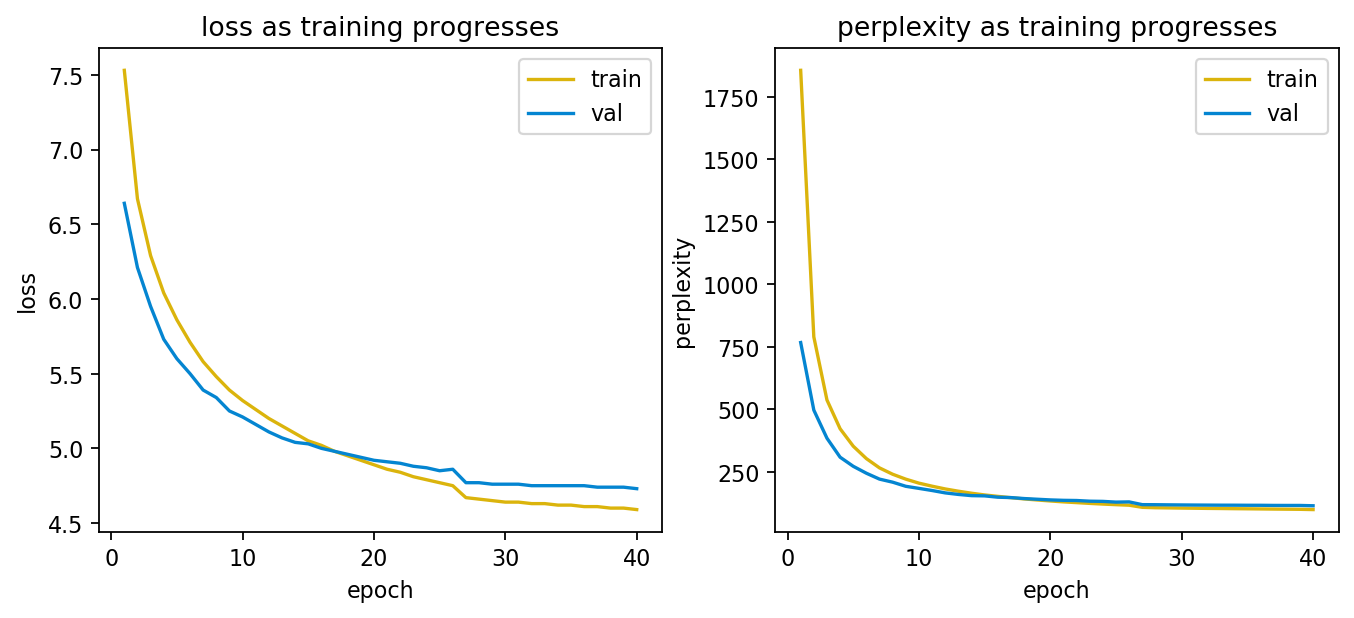

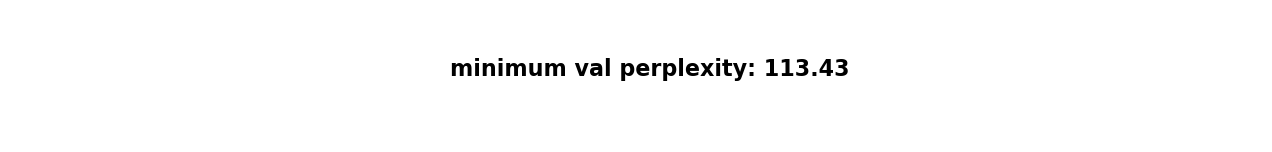

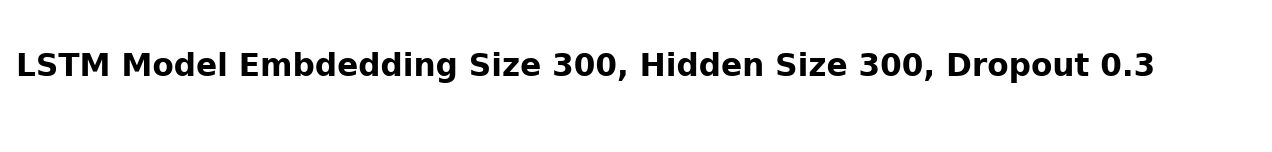

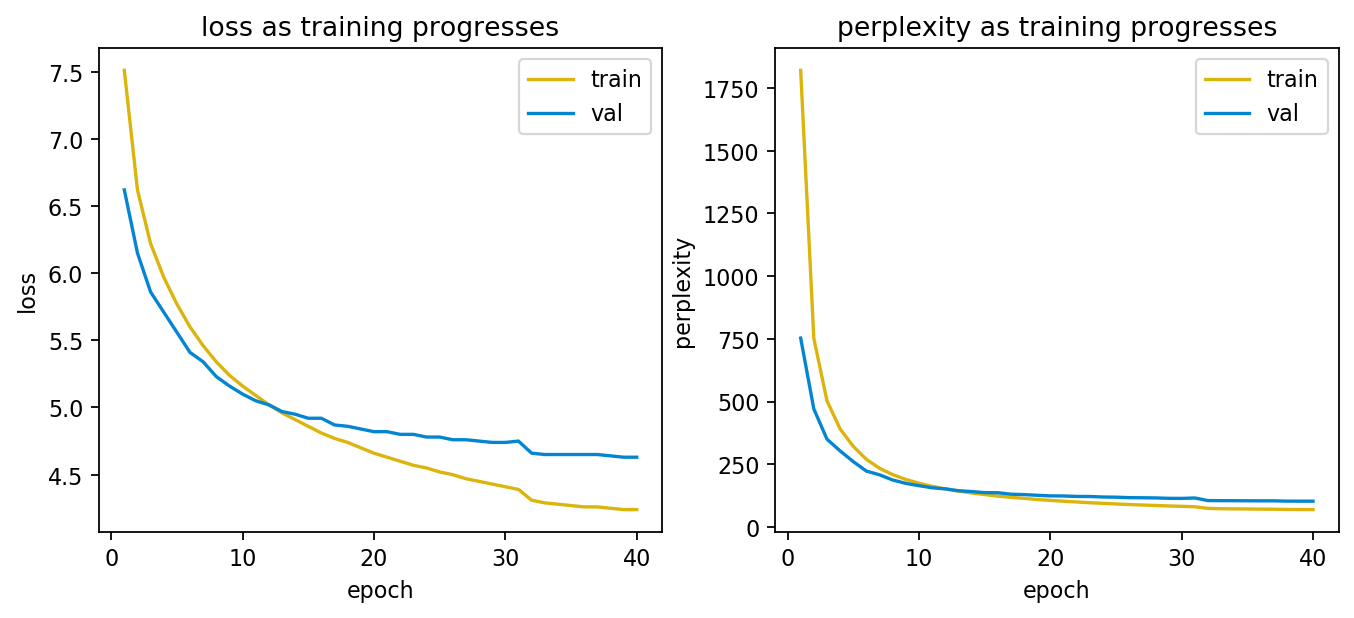

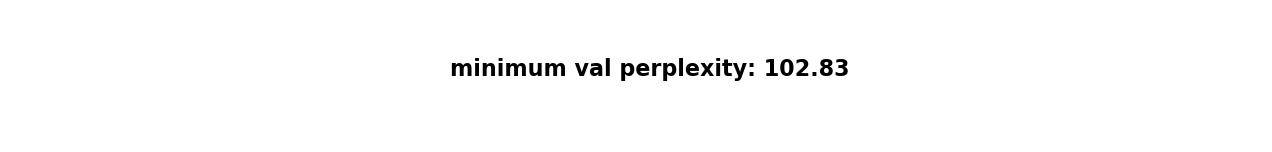

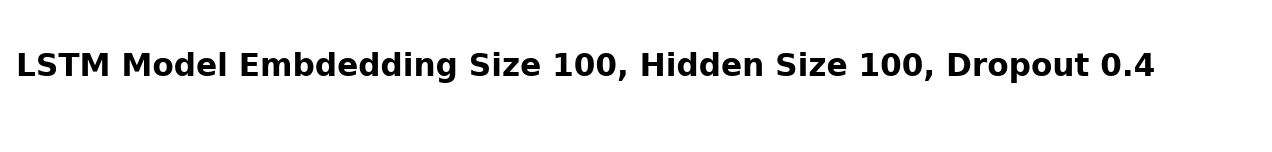

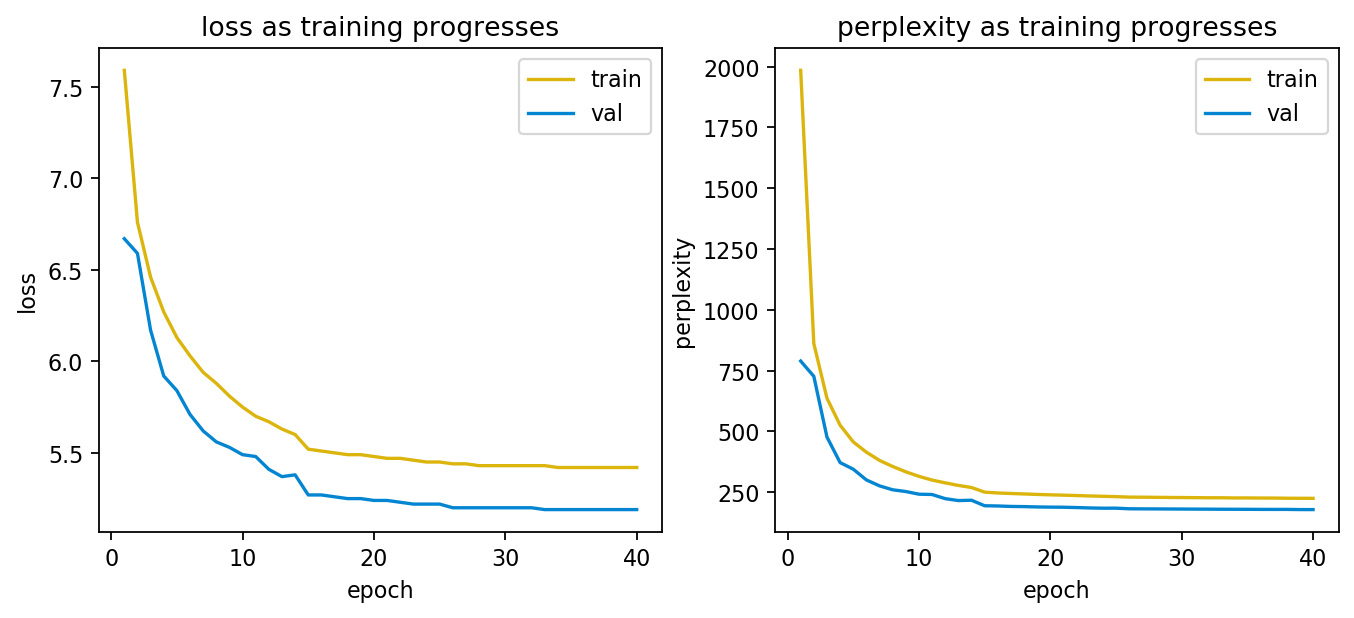

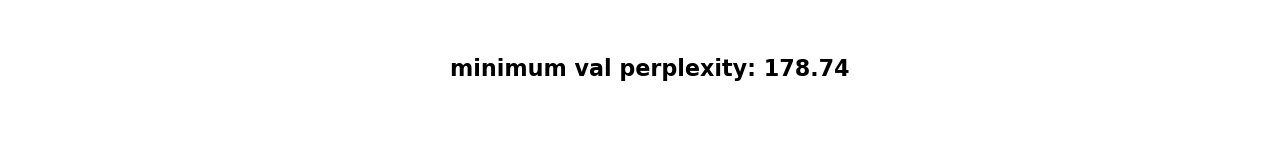

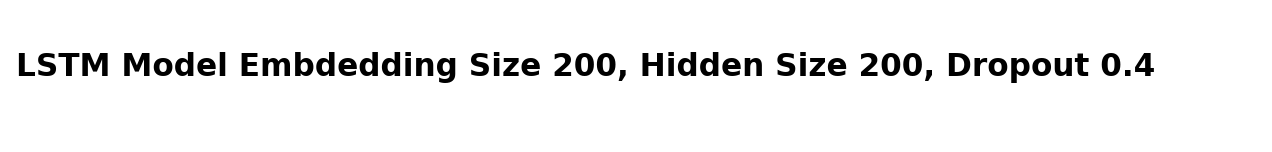

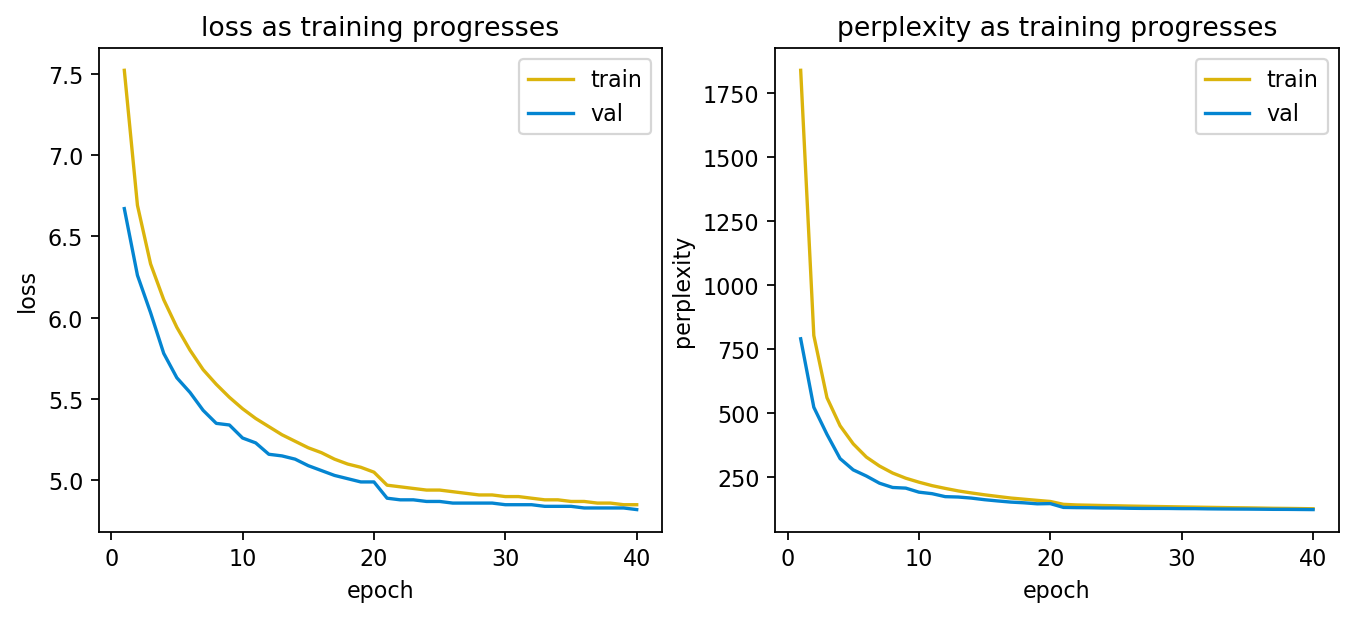

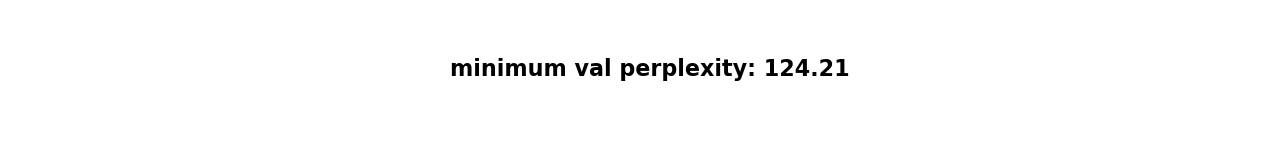

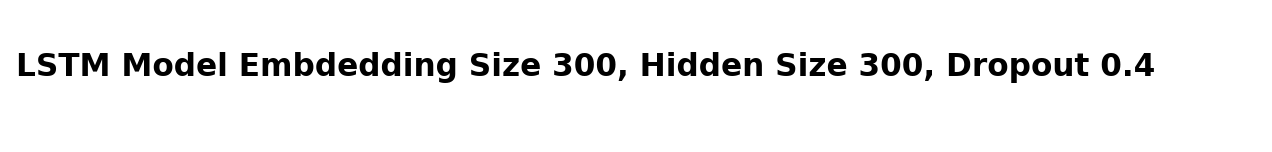

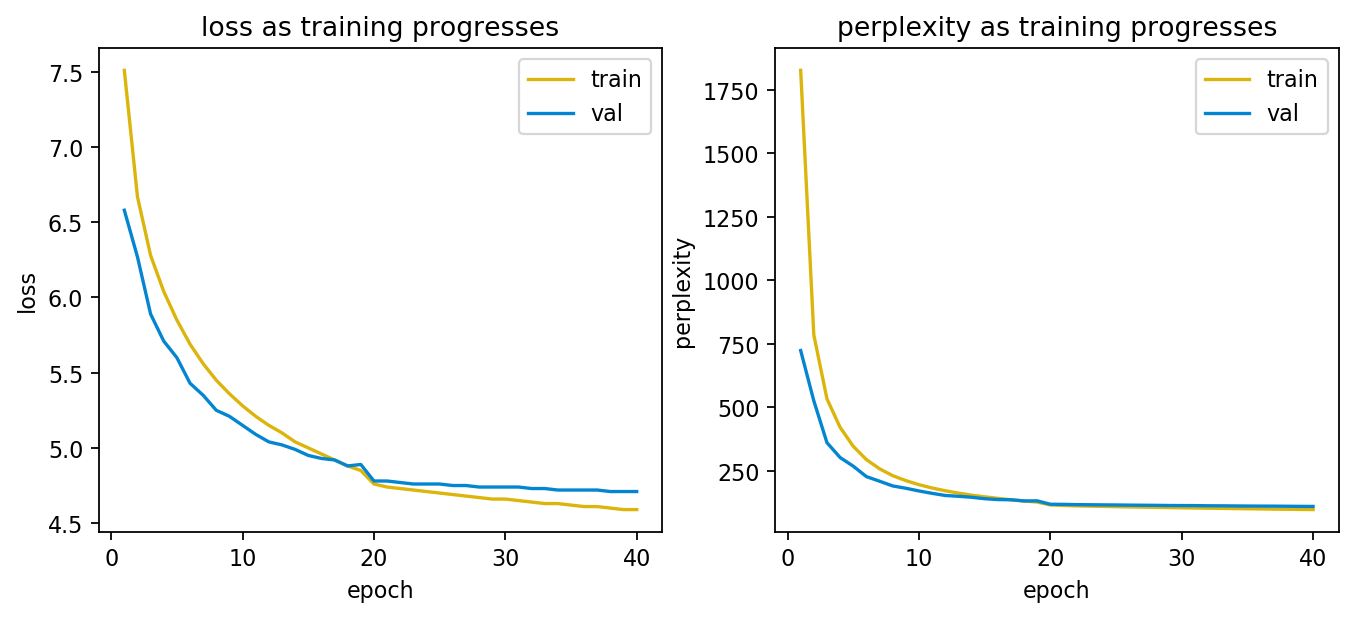

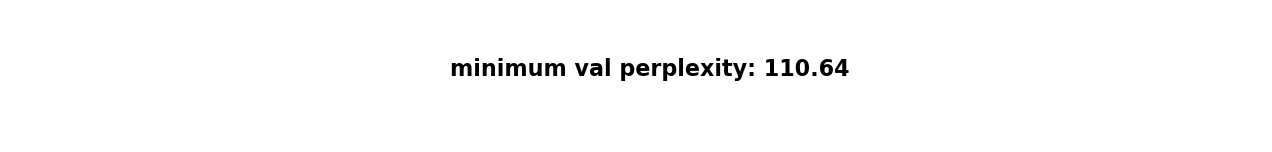

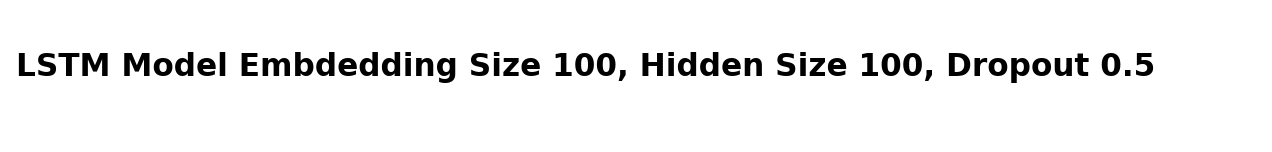

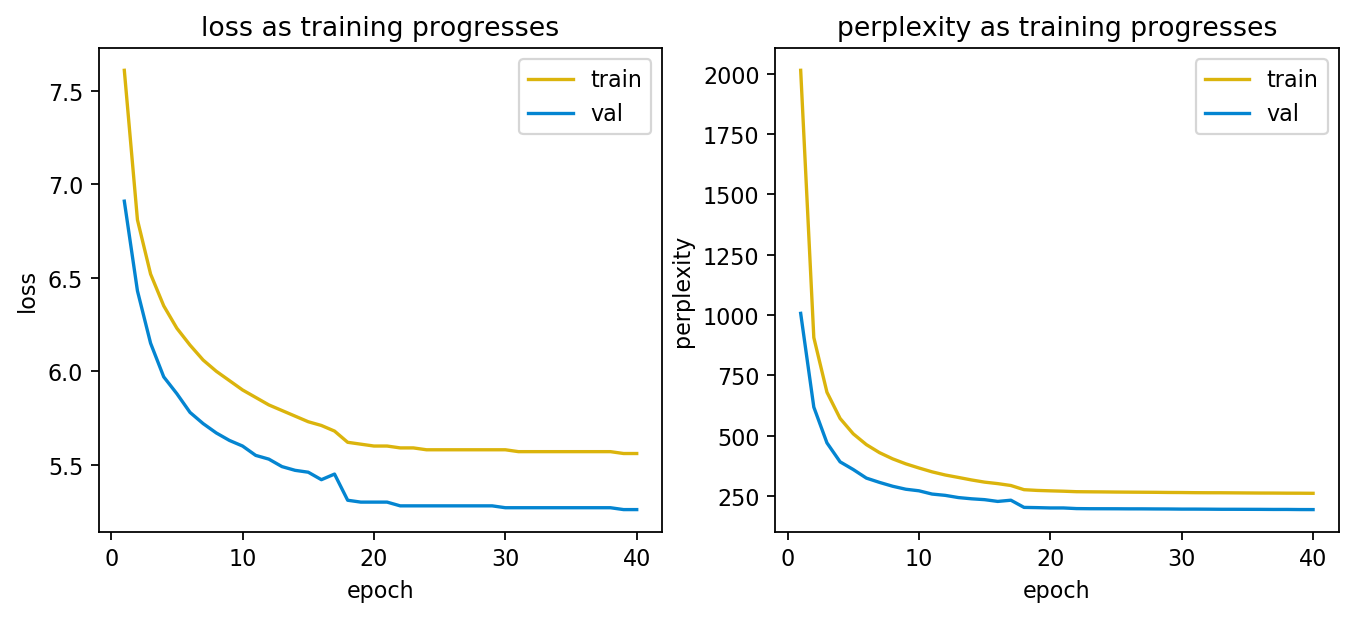

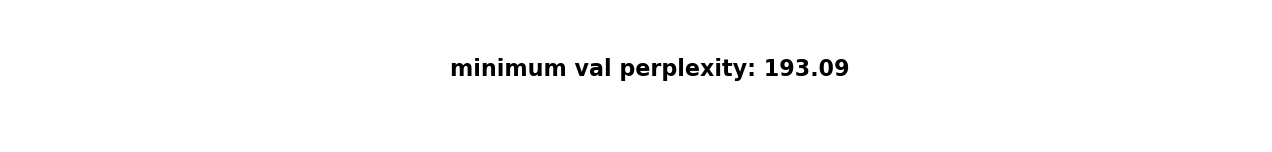

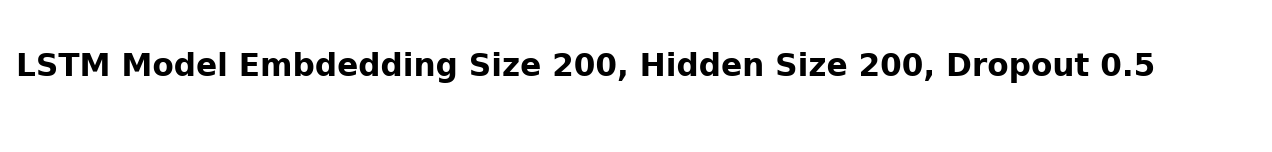

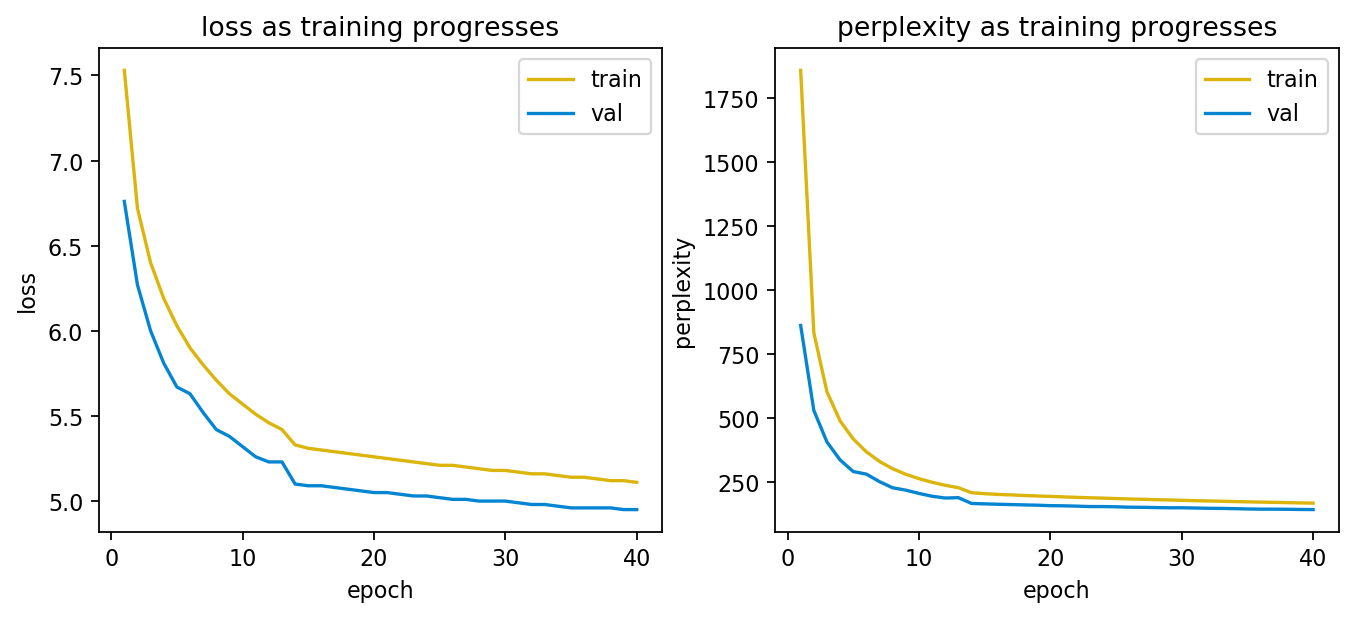

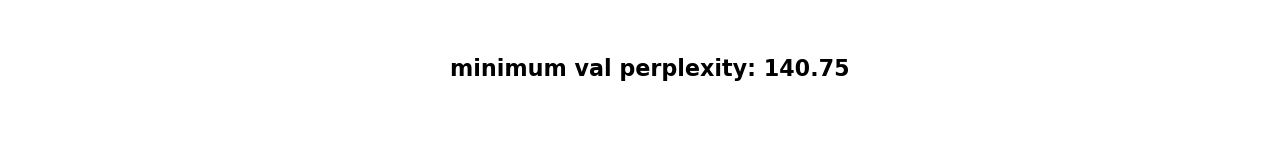

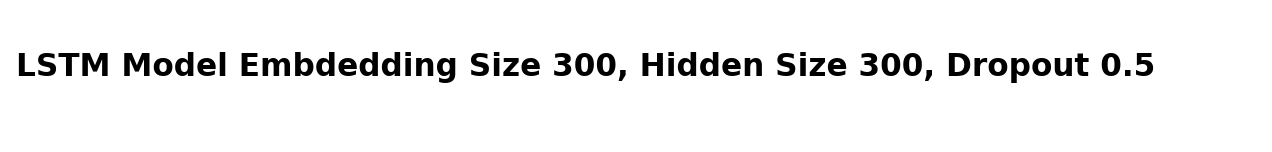

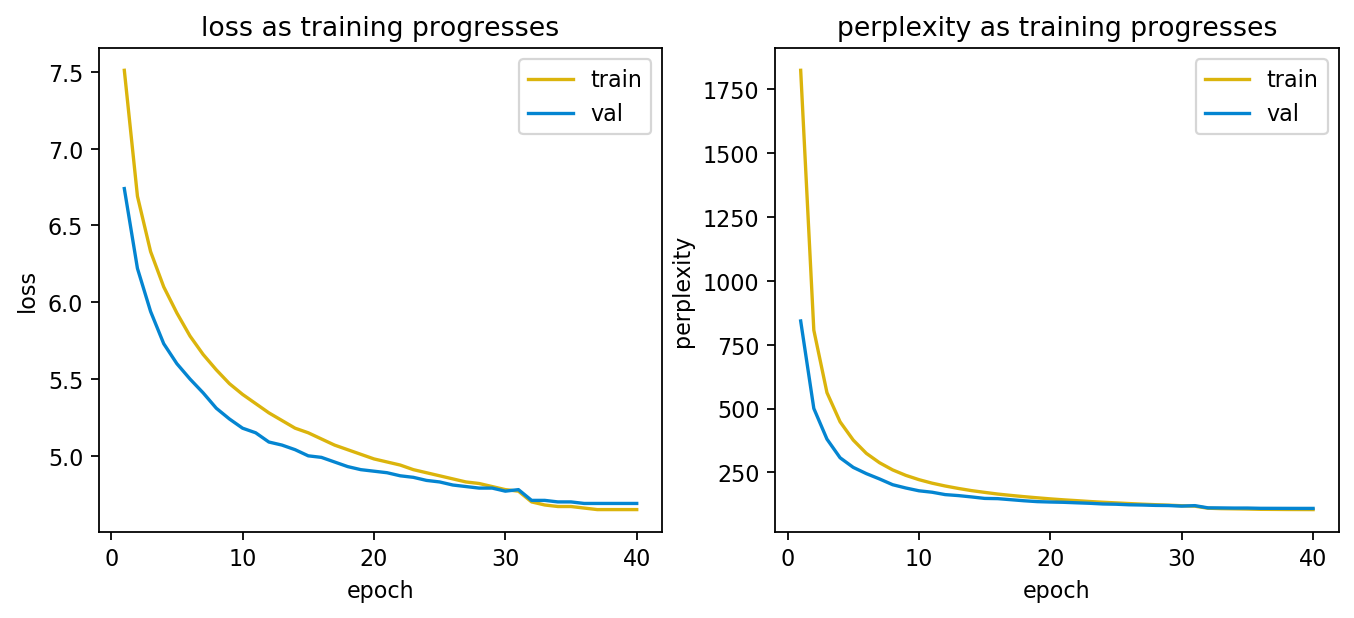

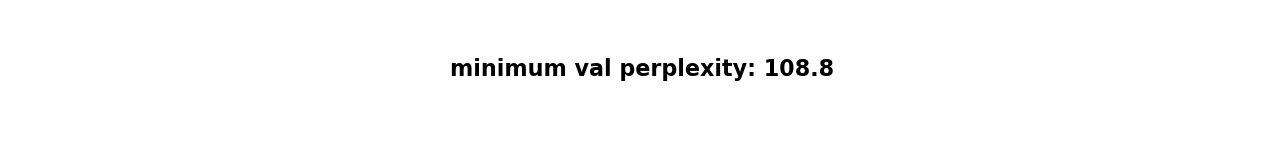

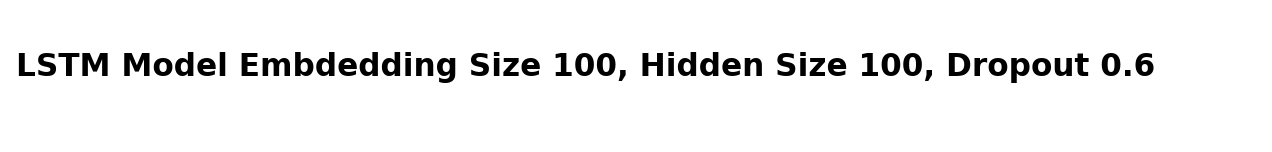

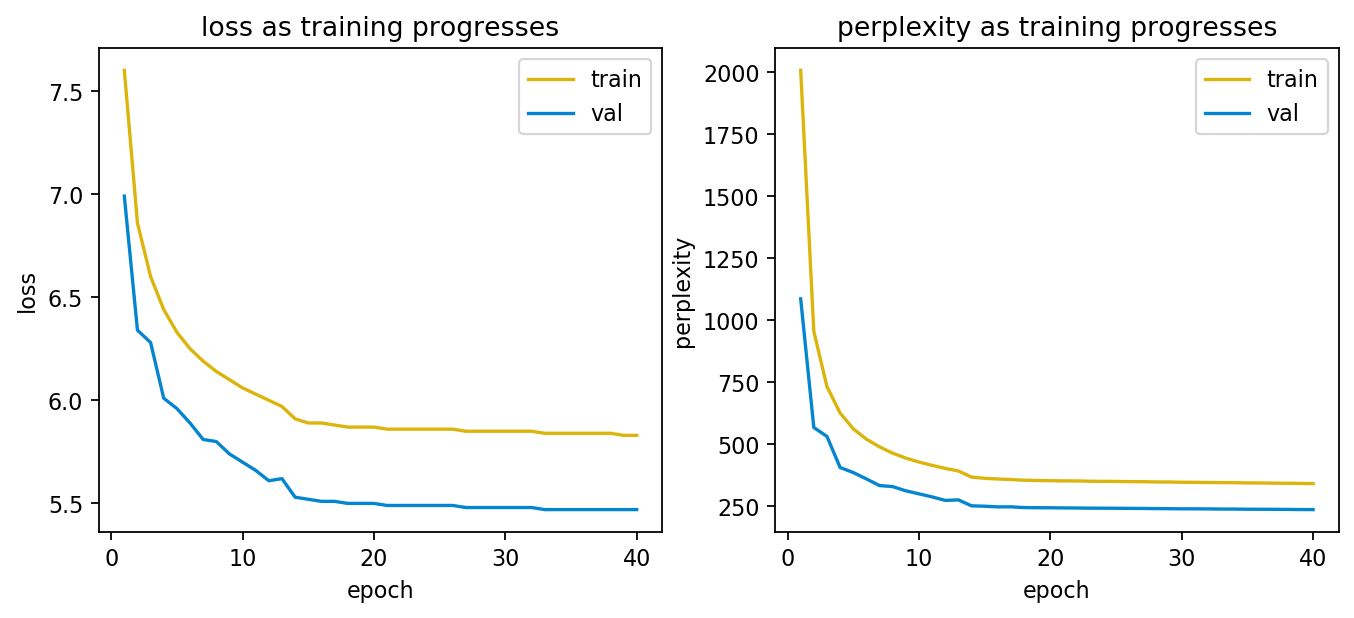

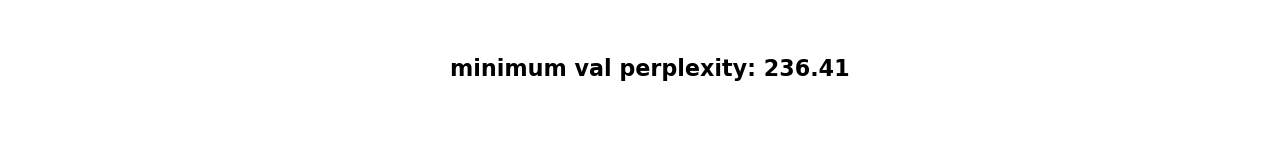

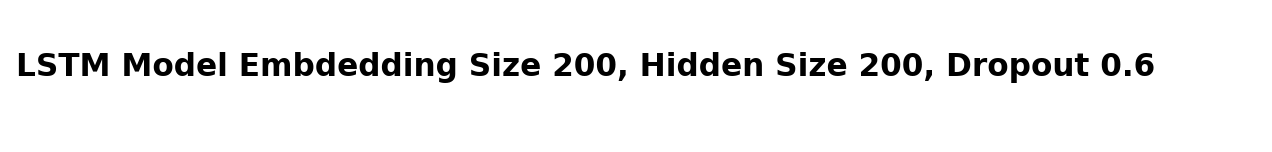

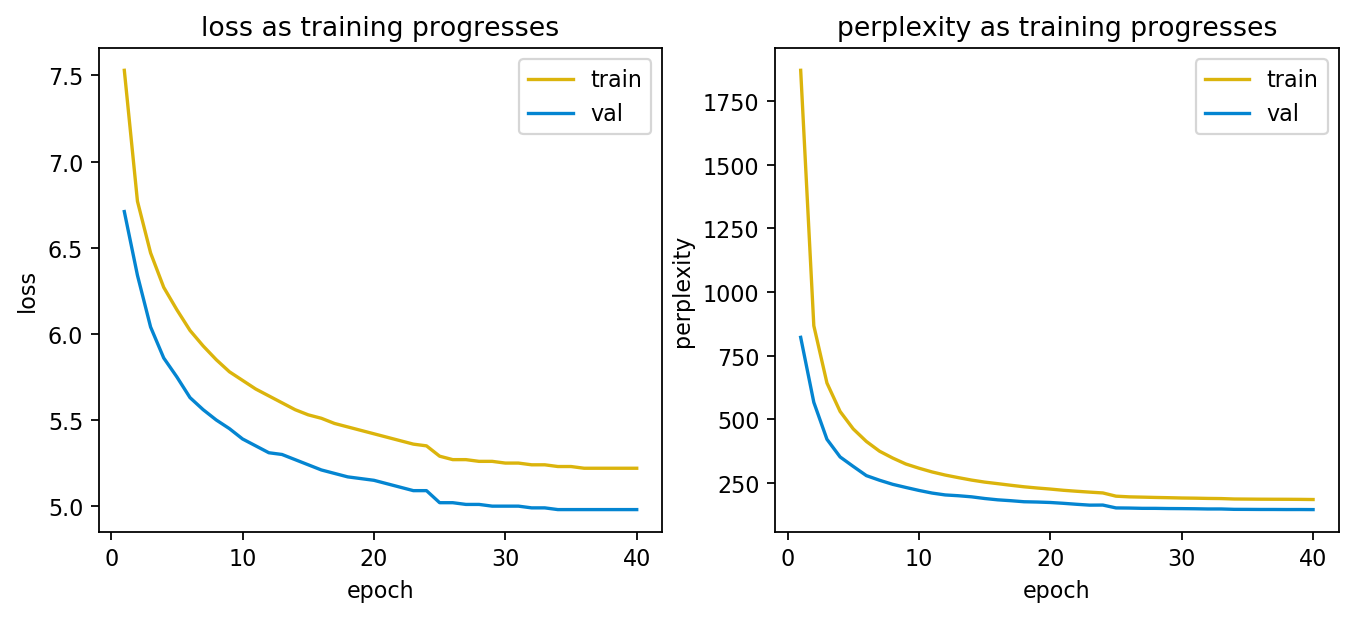

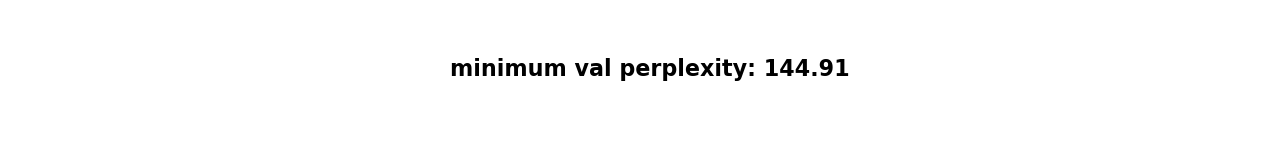

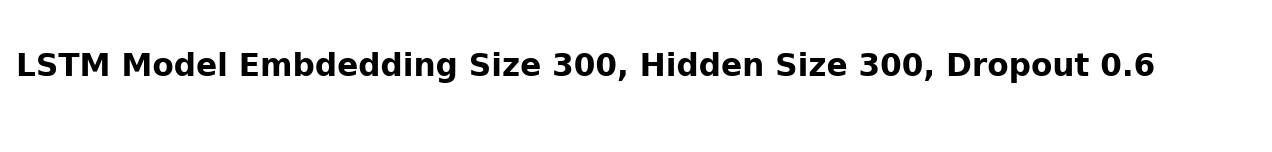

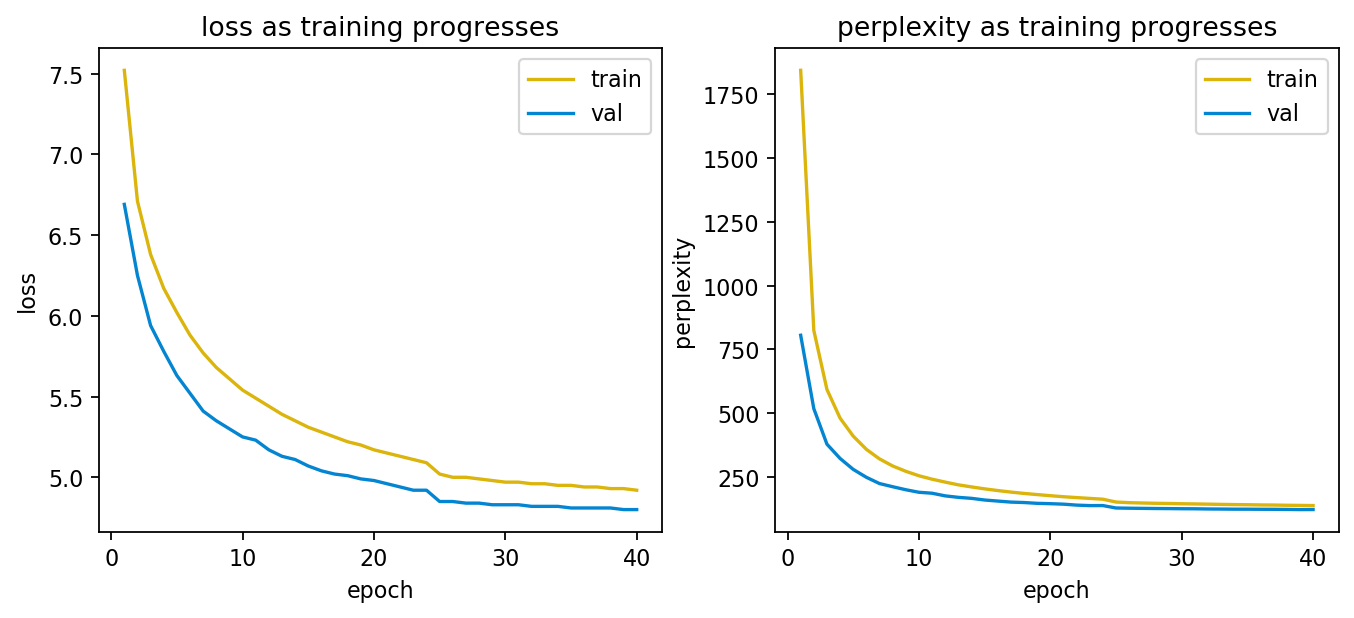

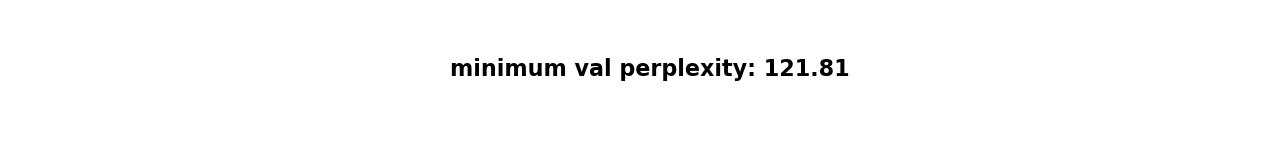

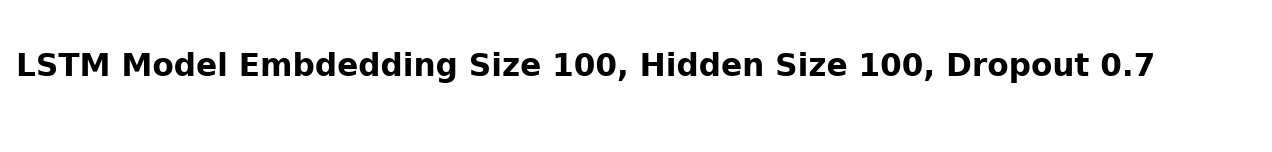

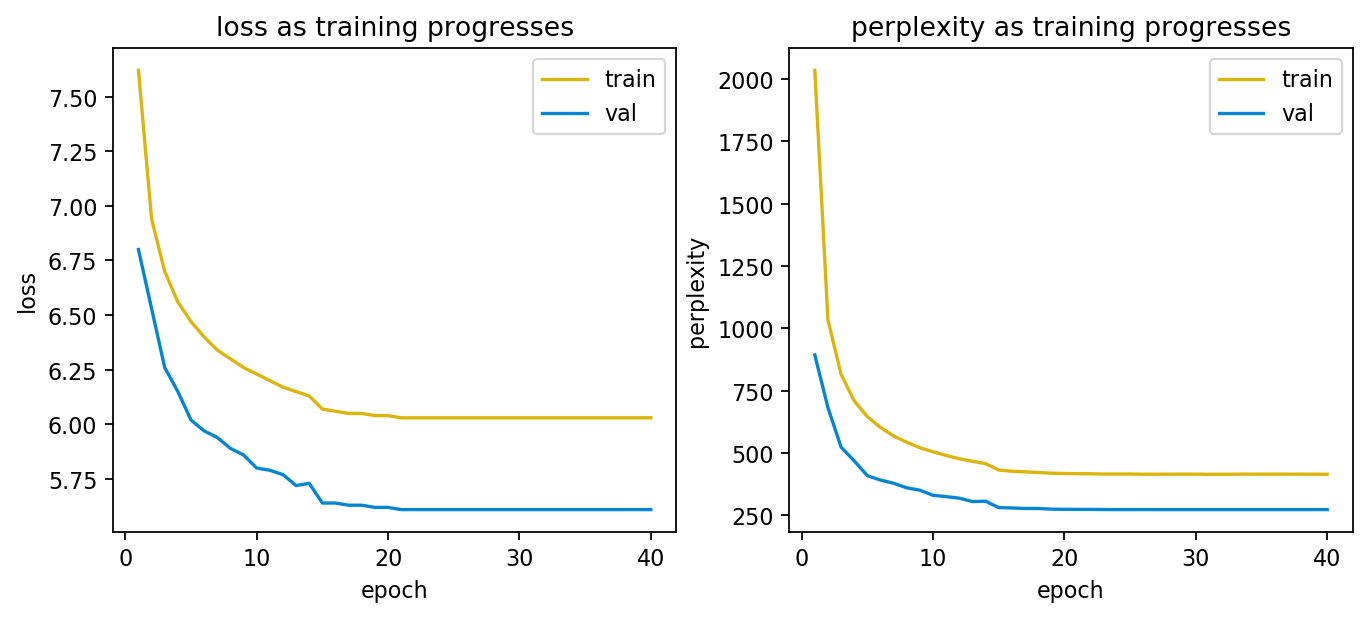

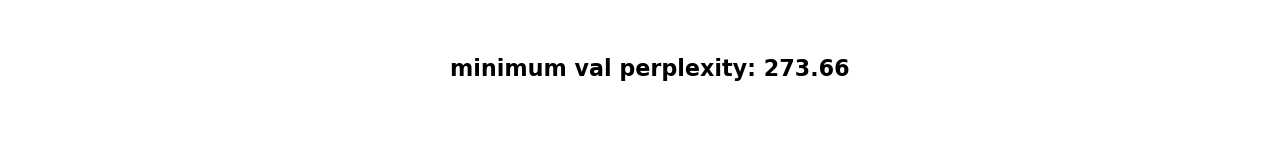

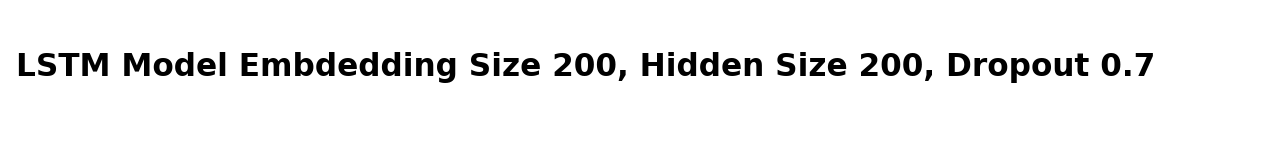

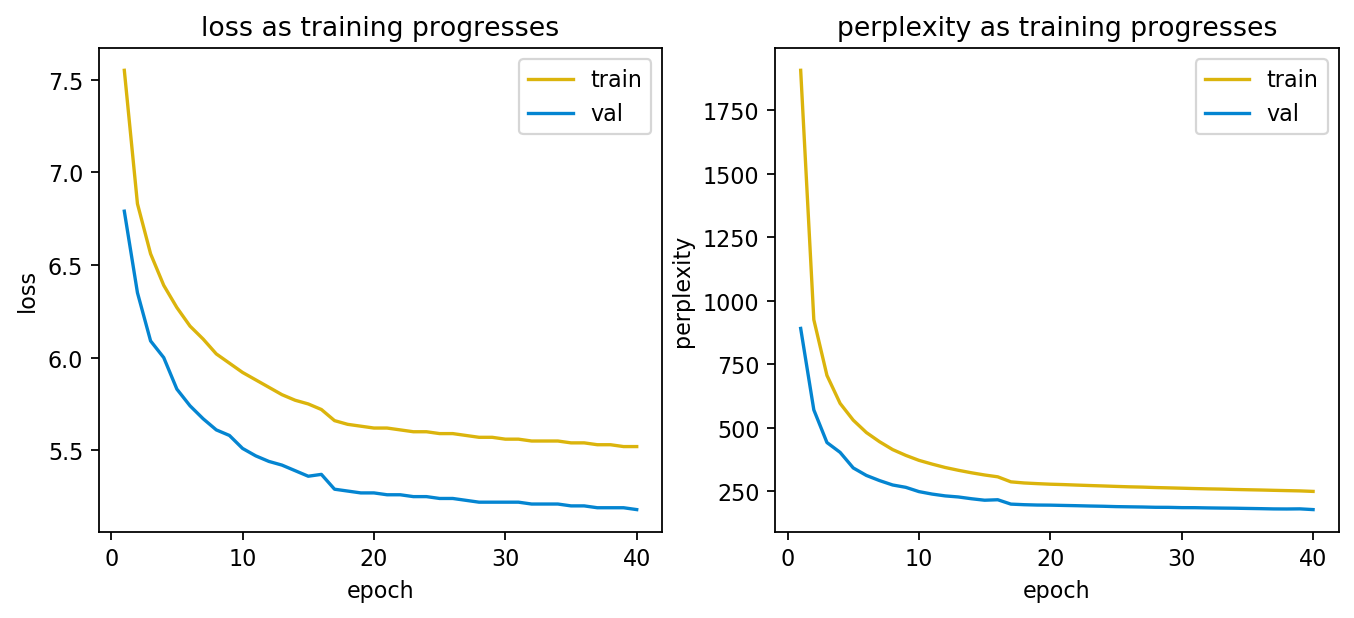

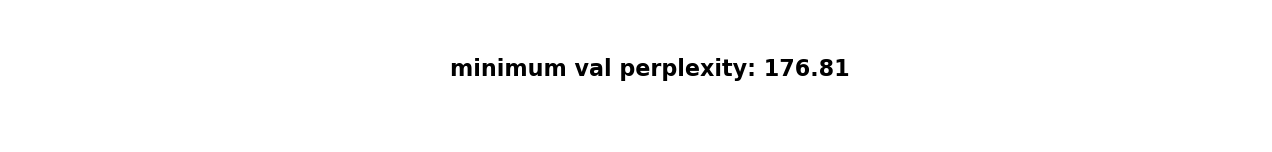

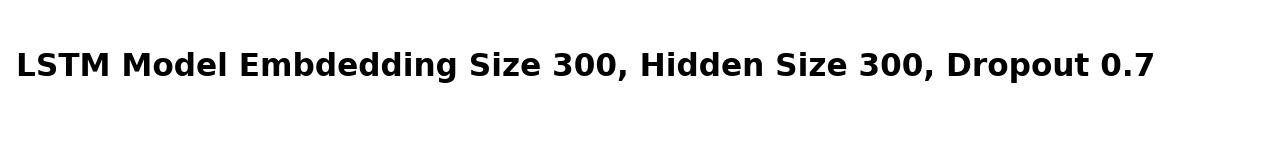

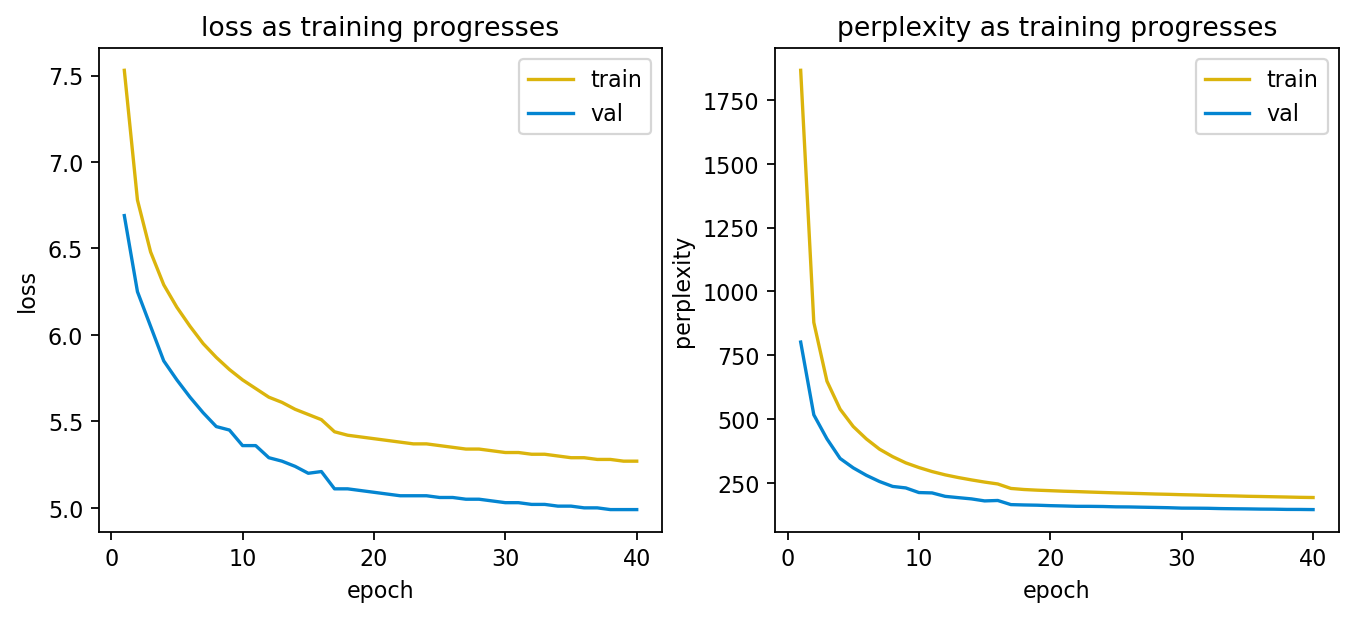

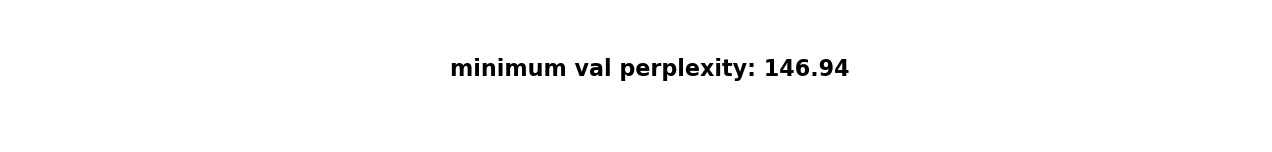

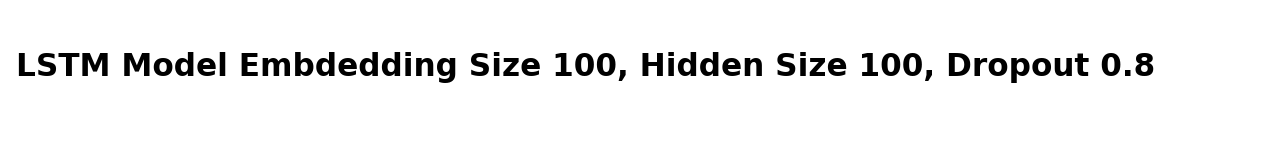

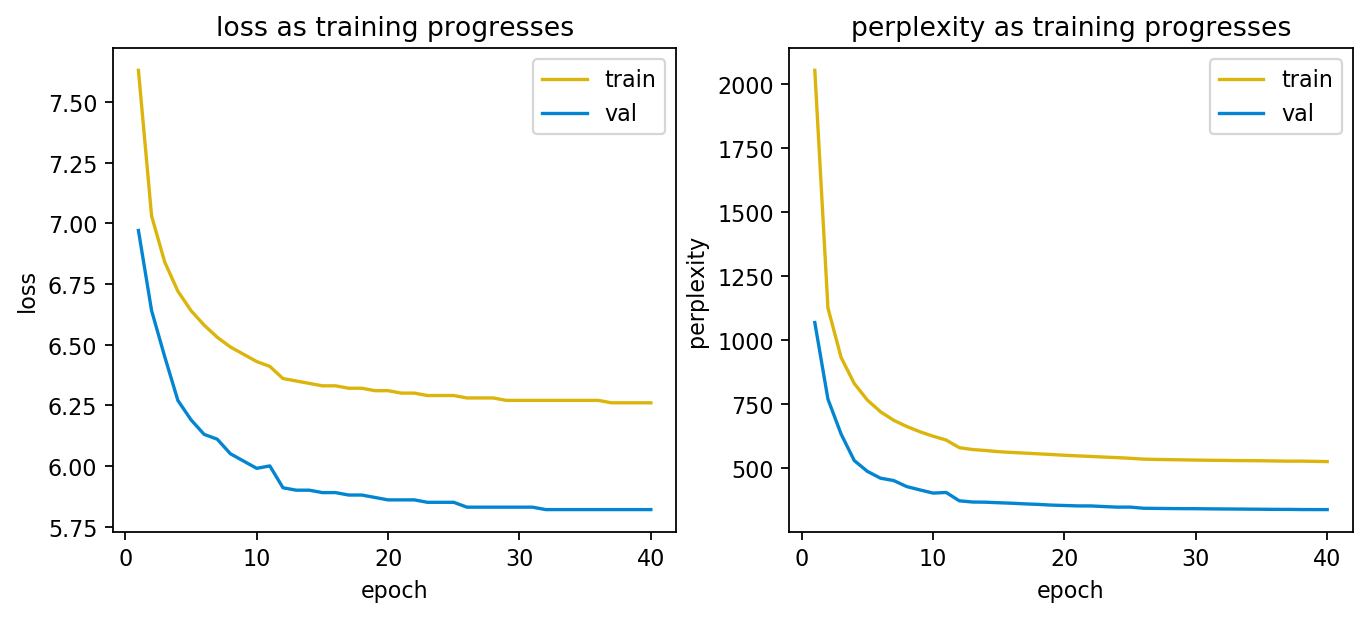

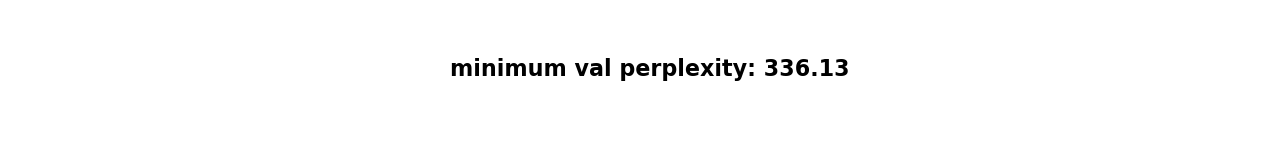

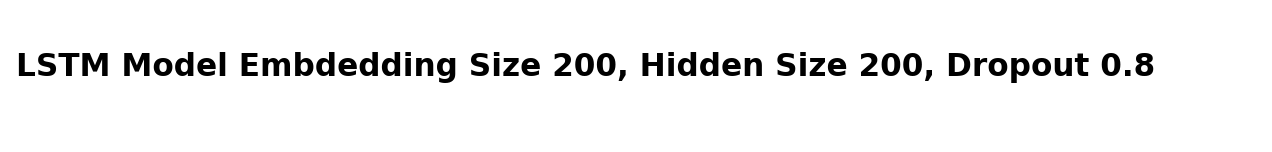

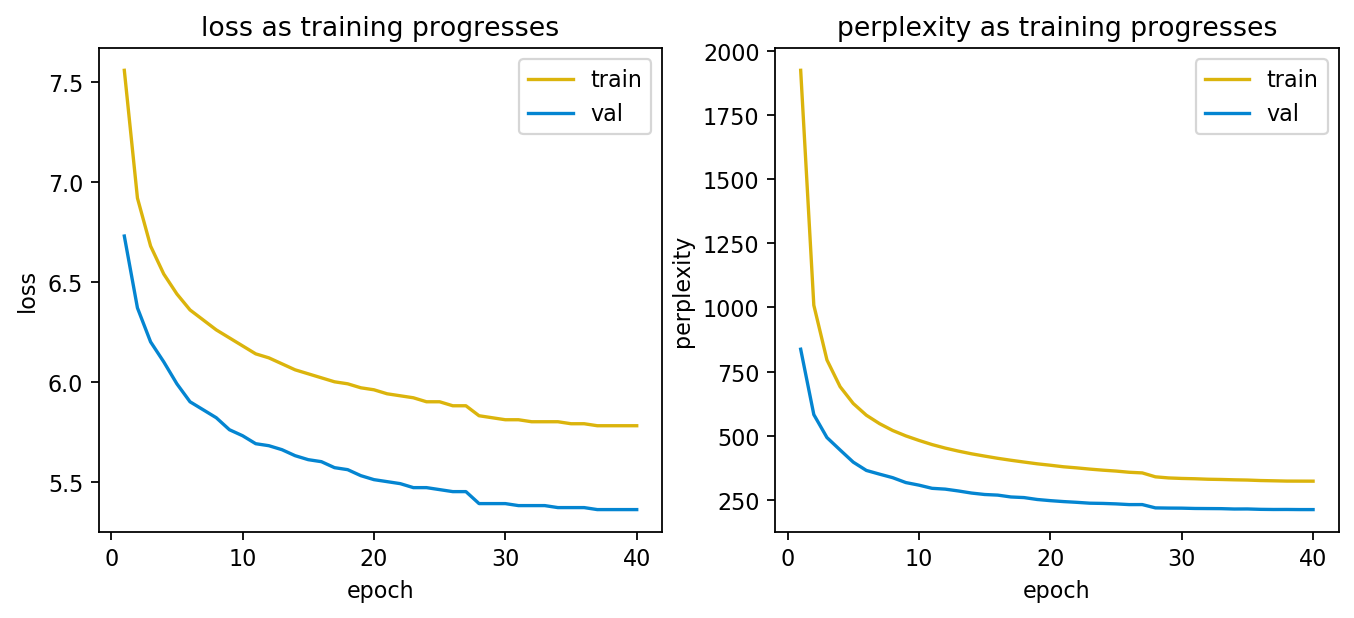

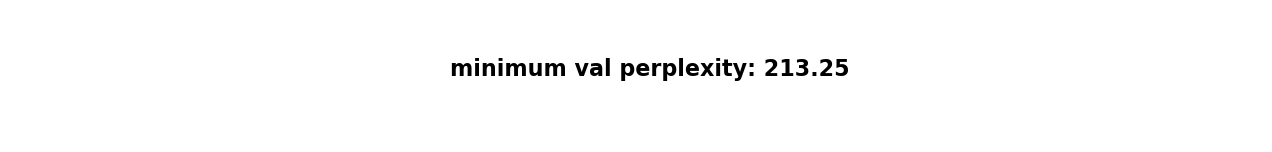

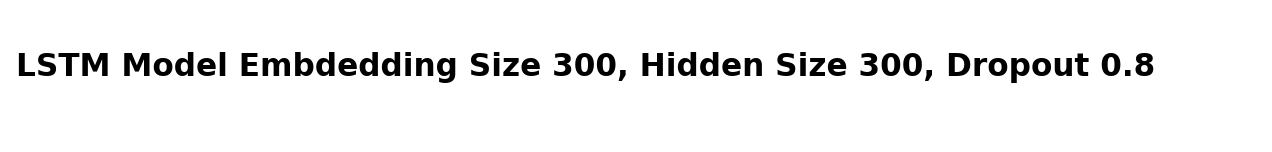

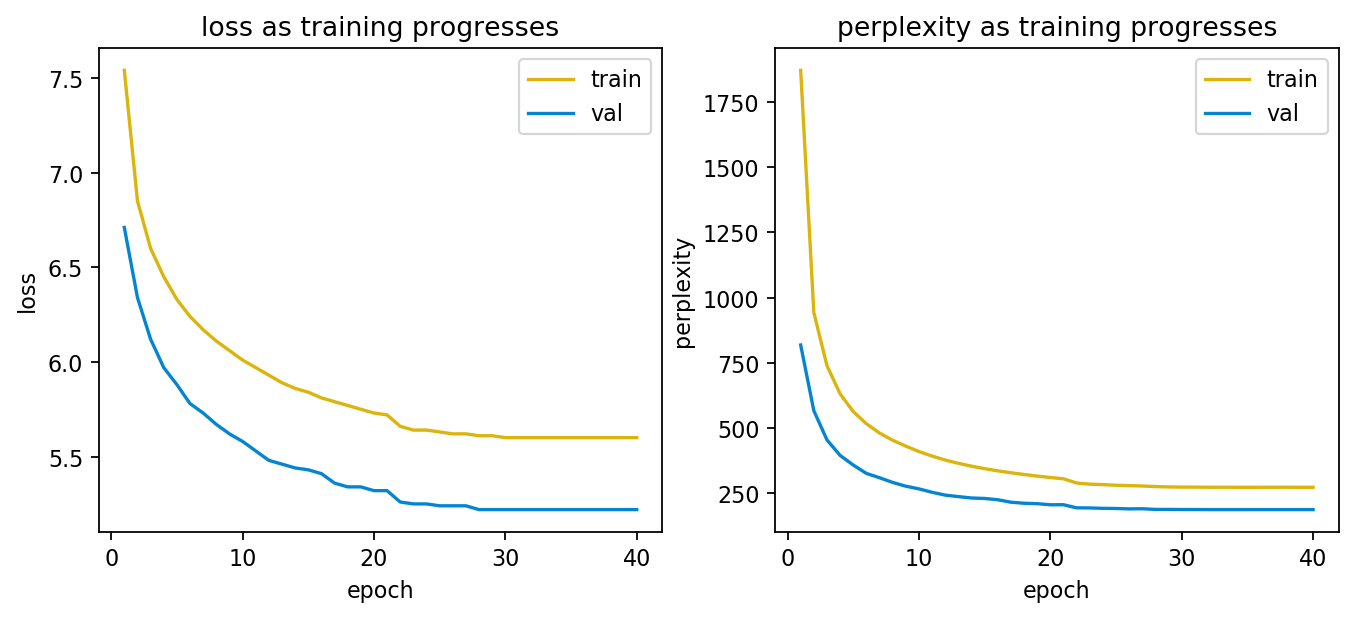

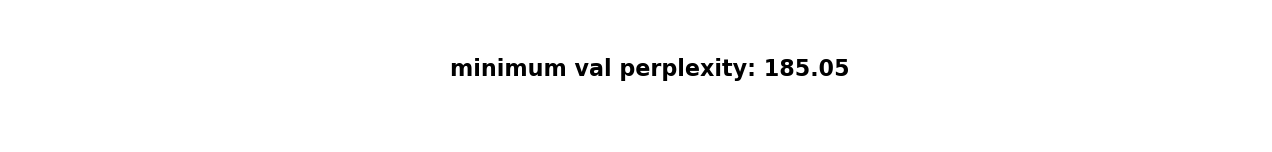

In [6]:
for dropout_prob in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    for emsize in [100, 200, 300]:
        show_heading(emsize, dropout_prob)
        filename = f'logs/lstm_emsize{emsize}_dropout{dropout_prob}_tied.txt'
        plot_loss_ppl(filename)
        show_min_val_ppl(filename)

In [36]:
def multibar(dropout_probs):
    # plot
    plt.figure(figsize=(10, 4), dpi=160)
    # set width of bar
    barWidth = 0.10
    
    # set height of bar
    bar_emsize100 = list(get_min_val_ppl(f'logs/lstm_emsize{100}_dropout{dropout_prob}_tied.txt') 
                                         for dropout_prob in dropout_probs)
    bar_emsize200 = list(get_min_val_ppl(f'logs/lstm_emsize{200}_dropout{dropout_prob}_tied.txt')
                                         for dropout_prob in dropout_probs)
    bar_emsize300 = list(get_min_val_ppl(f'logs/lstm_emsize{300}_dropout{dropout_prob}_tied.txt') 
                                         for dropout_prob in dropout_probs)

    # Set position of bar on X axis
    r1 = range(len(bar_emsize100))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bar_emsize100, color='xkcd:purple', width=barWidth, edgecolor='white', label='embedding size = 100')
    plt.bar(r2, bar_emsize200, color='xkcd:bright teal', width=barWidth, edgecolor='white', label='embedding size = 200')
    plt.bar(r3, bar_emsize300, color='xkcd:marigold', width=barWidth, edgecolor='white', label='embedding size = 300')
    
    # show ppl values as text
    plt.text(r1[0] - 0.05, bar_emsize100[0], 120, fontsize=5)
    
    # Add xticks on the middle of the group bars
    plt.xlabel('dropout probability')
    plt.xticks([r + barWidth for r in range(len(bar_emsize100))], dropout_probs)
    plt.ylabel('minimum val perplexity')
    plt.title('Results of Different Hyperparameters')
    plt.legend()
    plt.show()

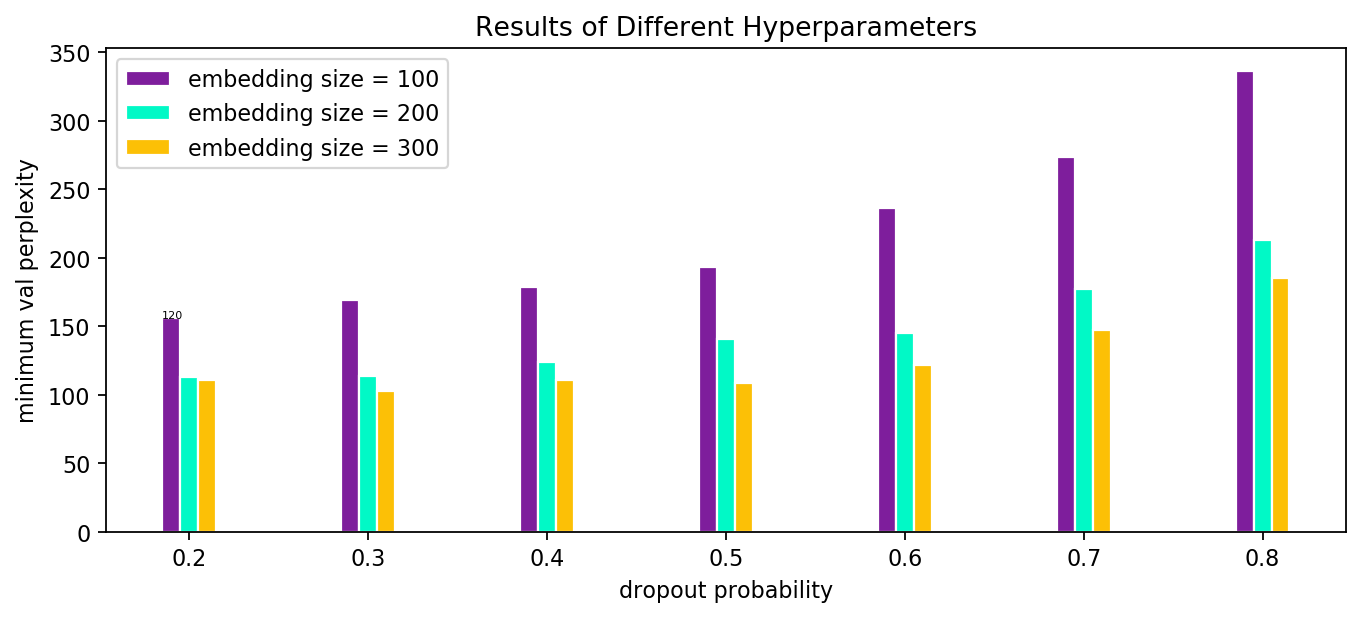

In [37]:
multibar(dropout_probs=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])